In [41]:
import pandas as pd
import warnings
import re
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np

# warning 없애기
warnings.filterwarnings("ignore")

# 글씨체 깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# df = pd.read_csv('C:/Users/wndus/OneDrive/바탕 화면/관광지추천/2차_전처리.csv', encoding = 'utf-8')
df = pd.read_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/2024_3차_전처리.csv')
df

,아이디,국가별,성별,연령별,문1. 주요 방한 목적,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1,문3-1. 고려한 관광활동_1,문3-2. 고려한 관광인프라_1,"문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)",...,주요 체재 지역,총 국내 지출경비,식비_비율,국내 교통비_비율,체험/활동비_비율,뷰티/의료비_비율,여행 서비스비_비율,숙박비_비율,쇼핑비_비율,기타 비용_비율
0,57,13,2,5,1,4,7.0,1.0,3.0,451.666667,...,서울,2310.000000,0.259740,0.064935,0.021645,0.00000,0.004329,0.432900,0.216450,0.000000
1,58,3,2,4,1,4,7.0,11.0,6.0,272.935000,...,서울,846.372229,0.143527,0.028705,0.004784,0.00000,0.000096,0.239212,0.574108,0.009568
2,59,3,2,3,1,3,7.0,12.0,2.0,177.650000,...,서울,742.948932,0.239078,0.054336,0.043469,0.00000,0.000217,0.217344,0.434688,0.010867
3,60,1,1,2,1,1,8.0,11.0,2.0,153.780000,...,서울,727.256097,0.287908,0.134357,0.000000,0.00000,0.001919,0.383877,0.191939,0.000000
4,61,3,2,2,1,4,2.0,1.0,4.0,329.460000,...,서울,1259.775985,0.038452,0.051269,0.000000,0.00000,0.000256,0.128172,0.769034,0.012817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10178,19271,1,2,2,1,1,5.0,3.0,3.0,126.316000,...,제주,495.169633,0.275482,0.027548,0.000000,0.00000,0.000000,0.550964,0.137741,0.008264
10179,19273,1,2,4,1,2,5.0,3.0,5.0,112.586000,...,제주,425.630000,0.258065,0.322581,0.000000,0.00000,0.000000,0.322581,0.096774,0.000000
10180,19274,1,1,4,1,2,9.0,12.0,4.0,52.860500,...,제주,178.653506,0.292683,0.073171,0.000000,0.00000,0.000000,0.390244,0.243902,0.000000
10181,19275,1,2,5,1,1,5.0,13.0,7.0,535.470000,...,제주,2512.800960,0.054570,0.005457,0.000000,0.74352,0.000000,0.032742,0.163711,0.000000


In [42]:
df.loc[:,df.columns.str.contains('문10. 1인 1일 지출경비')]

,"문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)"
0,451.666667
1,272.935000
2,177.650000
3,153.780000
4,329.460000
...,...
10178,126.316000
10179,112.586000
10180,52.860500
10181,535.470000


# 1. 1인 1일 지출경비

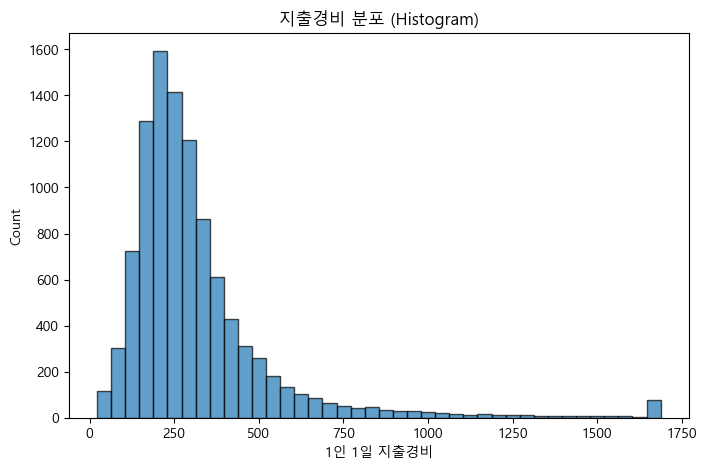

In [43]:
target_col = '문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)'

plt.figure(figsize=(8,5))
plt.hist(df[target_col], bins=40, edgecolor='black', alpha=0.7)
plt.xlabel('1인 1일 지출경비')
plt.ylabel('Count')
plt.title('지출경비 분포 (Histogram)')
plt.show()


In [44]:
quantiles = np.arange(0, 1.01, 0.05)   # 0%, 5%, 10%, ..., 100%
q_table = df[target_col].quantile(quantiles)

q_df = q_table.reset_index()
q_df.columns = ['Quantile', 'Value']
q_df

,Quantile,Value
0,0.00,22.000000
1,0.05,112.911306
2,0.10,140.745000
3,0.15,162.446680
4,0.20,178.666667
5,0.25,191.987819
6,0.30,205.316750
7,0.35,217.932500
8,0.40,231.000000
9,0.45,244.400000


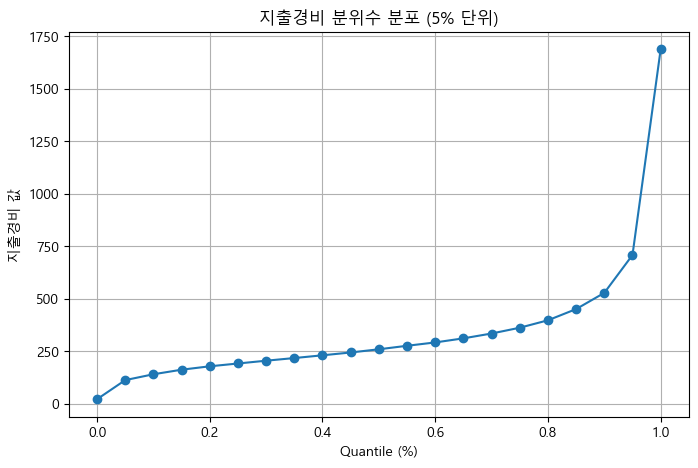

In [45]:
plt.figure(figsize=(8,5))
plt.plot(q_df['Quantile'], q_df['Value'], marker='o')
plt.xlabel('Quantile (%)')
plt.ylabel('지출경비 값')
# plt.xlim(0, 0.95) 
# plt.ylim(0, 600)
plt.title('지출경비 분위수 분포 (5% 단위)')
plt.grid(True)
plt.show()

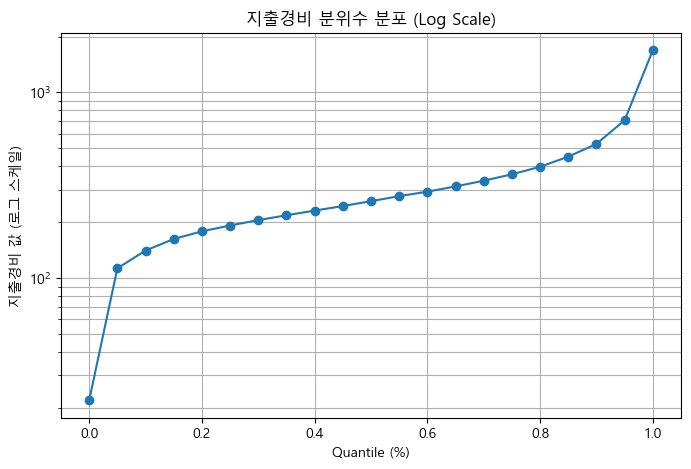

In [46]:
plt.figure(figsize=(8,5))
plt.plot(q_df['Quantile'], q_df['Value'], marker='o')
plt.yscale('log')
plt.xlabel('Quantile (%)')
plt.ylabel('지출경비 값 (로그 스케일)')
plt.title('지출경비 분위수 분포 (Log Scale)')
plt.grid(True, which='both')
plt.show()

원래 방식으로 구간화하기

In [47]:
# q_df 는 다음 형태로 이미 존재한다:
# Quantile | Value

q = q_df['Quantile'].values
v = q_df['Value'].values

# 인접 분위수 간 차이 계산
diff = np.diff(v)  # Value 차이
step = np.diff(q)  # Quantile 차이 (여기서는 전부 5씩)

# 기울기(증가량) = diff / step 이지만 step은 일정하므로 diff 자체로 비교 가능
slope = diff / step

# 구간 테이블 생성
slope_df = pd.DataFrame({
    'q_start': q[:-1],
    'q_end': q[1:],
    'v_start': v[:-1],
    'v_end': v[1:],
    'diff': diff,
    'slope': slope
})

# 기울기 큰 순으로 7개 구간 추출
top7 = slope_df.reindex(slope_df['slope'].abs().sort_values(ascending=False).index).head(7)

top7

,q_start,q_end,v_start,v_end,diff,slope
19,0.95,1.00,708.250000,1687.500000,979.250000,19585.000000
18,0.90,0.95,528.034286,708.250000,180.215714,3604.314286
0,0.00,0.05,22.000000,112.911306,90.911306,1818.226129
17,0.85,0.90,450.973594,528.034286,77.060692,1541.213839
16,0.80,0.85,397.650000,450.973594,53.323594,1066.471875
15,0.75,0.80,362.264875,397.650000,35.385125,707.702500
1,0.05,0.10,112.911306,140.745000,27.833694,556.673871


In [48]:
slope_df.reindex(slope_df['slope'].abs().sort_values(ascending=False).index)

# 90 ~ 100 % 
# 65 ~ 90 %
# 55 ~ 65 %
# 15 ~ 55 % 
# 5 ~ 15 %
# 0 ~ 5 %

,q_start,q_end,v_start,v_end,diff,slope
19,0.95,1.00,708.250000,1687.500000,979.250000,19585.000000
18,0.90,0.95,528.034286,708.250000,180.215714,3604.314286
0,0.00,0.05,22.000000,112.911306,90.911306,1818.226129
17,0.85,0.90,450.973594,528.034286,77.060692,1541.213839
16,0.80,0.85,397.650000,450.973594,53.323594,1066.471875
15,0.75,0.80,362.264875,397.650000,35.385125,707.702500
1,0.05,0.10,112.911306,140.745000,27.833694,556.673871
14,0.70,0.75,334.696000,362.264875,27.568875,551.377500
13,0.65,0.70,311.666667,334.696000,23.029333,460.586667
2,0.10,0.15,140.745000,162.446680,21.701680,434.033600


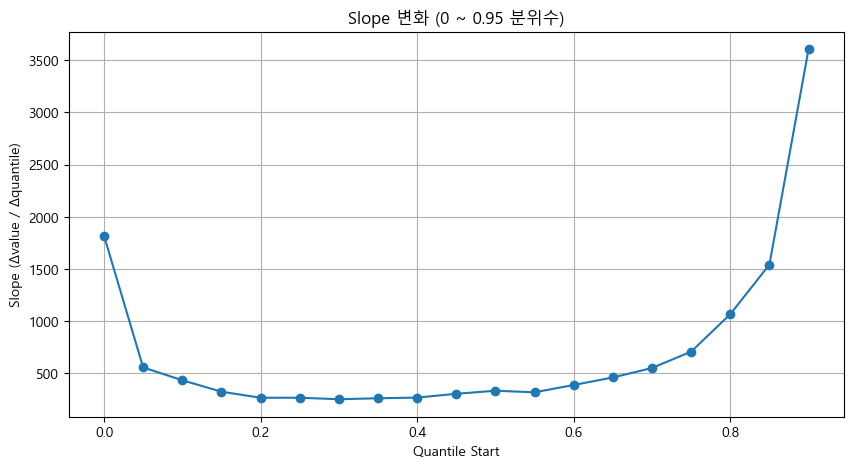

In [49]:
import matplotlib.pyplot as plt
# 0.95 이상 q_start 제거
slope_df_trim = slope_df[slope_df["q_start"] < 0.95].copy()
plt.figure(figsize=(10,5))
plt.plot(slope_df_trim["q_start"], slope_df_trim["slope"], marker='o')
plt.xlabel("Quantile Start")
plt.ylabel("Slope (Δvalue / Δquantile)")
plt.title("Slope 변화 (0 ~ 0.95 분위수)")
plt.grid(True)
plt.show()

In [50]:
### 구간화 ###

col = '문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)'

# 분위수 기준값
# p20 = 106.08
# p50 = 177.765
# p80 = 298.14
# p90 = 400
# p95 = 540.9375

p5 = 112.911306
p75 = 362.264875
p90 = 528.034286
p100 = 1687.500000

def segment(x):
    if x < p5:
        return 1
    elif x < p75:
        return 2
    elif x < p90:
        return 3
    # elif x < p90:
    #     return 4
    # elif x < p95:
    #     return 5
    else:
        return 4

df[col] = df[col].apply(segment)


df['문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)'].value_counts()

문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)
2    7109
3    1523
4    1043
1     508
Name: count, dtype: int64

In [51]:
df.head()

,아이디,국가별,성별,연령별,문1. 주요 방한 목적,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1,문3-1. 고려한 관광활동_1,문3-2. 고려한 관광인프라_1,"문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)",...,주요 체재 지역,총 국내 지출경비,식비_비율,국내 교통비_비율,체험/활동비_비율,뷰티/의료비_비율,여행 서비스비_비율,숙박비_비율,쇼핑비_비율,기타 비용_비율
0,57,13,2,5,1,4,7.0,1.0,3.0,3,...,서울,2310.000000,0.259740,0.064935,0.021645,0.0,0.004329,0.432900,0.216450,0.000000
1,58,3,2,4,1,4,7.0,11.0,6.0,2,...,서울,846.372229,0.143527,0.028705,0.004784,0.0,0.000096,0.239212,0.574108,0.009568
2,59,3,2,3,1,3,7.0,12.0,2.0,2,...,서울,742.948932,0.239078,0.054336,0.043469,0.0,0.000217,0.217344,0.434688,0.010867
3,60,1,1,2,1,1,8.0,11.0,2.0,2,...,서울,727.256097,0.287908,0.134357,0.000000,0.0,0.001919,0.383877,0.191939,0.000000
4,61,3,2,2,1,4,2.0,1.0,4.0,2,...,서울,1259.775985,0.038452,0.051269,0.000000,0.0,0.000256,0.128172,0.769034,0.012817


# 2. 총 체제기간

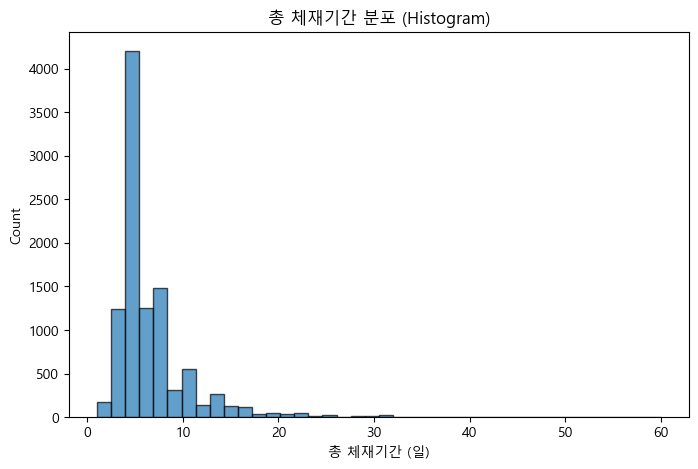

In [52]:
target_col2 = '문9-3. 총 체재기간_61일 이상 결측'

plt.figure(figsize=(8,5))
plt.hist(df[target_col2], bins=40, edgecolor='black', alpha=0.7)
plt.xlabel('총 체재기간 (일)')
plt.ylabel('Count')
plt.title('총 체재기간 분포 (Histogram)')
plt.show()


In [53]:
quantiles = np.arange(0, 1.01, 0.05)   # 0%, 5%, 10%, ..., 100%
q_table2 = df[target_col2].quantile(quantiles)

q_df2 = q_table2.reset_index()
q_df2.columns = ['Quantile', 'Value']
q_df2


,Quantile,Value
0,0.00,1.0
1,0.05,3.0
2,0.10,3.0
3,0.15,4.0
4,0.20,4.0
5,0.25,4.0
6,0.30,4.0
7,0.35,5.0
8,0.40,5.0
9,0.45,5.0


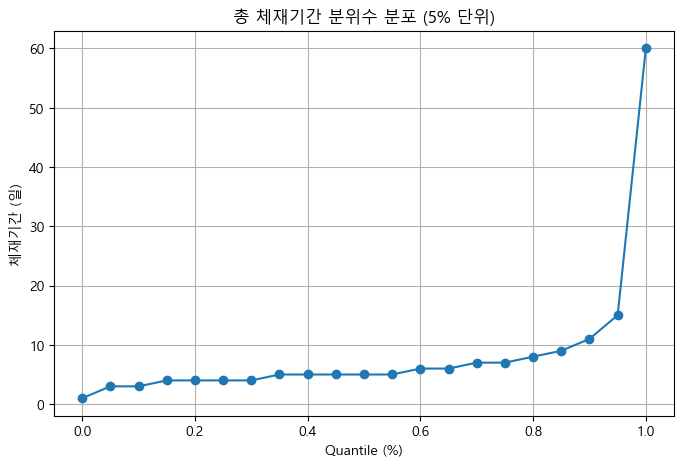

In [54]:
plt.figure(figsize=(8,5))
plt.plot(q_df2['Quantile'], q_df2['Value'], marker='o')
plt.xlabel('Quantile (%)')
plt.ylabel('체재기간 (일)')
plt.title('총 체재기간 분위수 분포 (5% 단위)')
plt.grid(True)
plt.show()

In [55]:
q = q_df2['Quantile'].values
v = q_df2['Value'].values

# 인접 분위수 간 차이 계산
diff = np.diff(v)      # Value 차이
step = np.diff(q)      # Quantile 차이 (여기서는 전부 5씩 일정)

# 기울기(증가량) = diff / step (step 일정이라 diff로 비교해도 동일)
slope = diff / step

# 구간 테이블 생성
slope_df2 = pd.DataFrame({
    'q_start': q[:-1],
    'q_end': q[1:],
    'v_start': v[:-1],
    'v_end': v[1:],
    'diff': diff,
    'slope': slope
})

# 기울기(절댓값) 큰 순으로 상위 7개 구간 추출
top7_stay = slope_df2.reindex(slope_df2['slope'].abs().sort_values(ascending=False).index)

top7_stay


,q_start,q_end,v_start,v_end,diff,slope
19,0.95,1.00,15.0,60.0,45.0,900.0
18,0.90,0.95,11.0,15.0,4.0,80.0
17,0.85,0.90,9.0,11.0,2.0,40.0
0,0.00,0.05,1.0,3.0,2.0,40.0
6,0.30,0.35,4.0,5.0,1.0,20.0
2,0.10,0.15,3.0,4.0,1.0,20.0
11,0.55,0.60,5.0,6.0,1.0,20.0
13,0.65,0.70,6.0,7.0,1.0,20.0
15,0.75,0.80,7.0,8.0,1.0,20.0
16,0.80,0.85,8.0,9.0,1.0,20.0


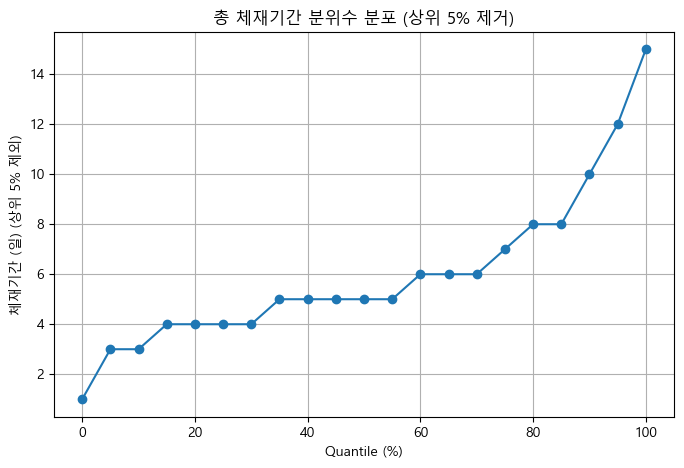

In [56]:
# 상위 5% cutoff
cut2 = df[target_col2].quantile(0.95)
# 상위 5% 제외한 데이터로 재분석
df_trim2 = df[df[target_col2] <= cut2]
quantiles = np.arange(0, 1.01, 0.05)
q_table_trim2 = df_trim2[target_col2].quantile(quantiles)
q_df_trim2 = q_table_trim2.reset_index()
q_df_trim2.columns = ['Quantile', 'Value']
q_df_trim2['Quantile'] = q_df_trim2['Quantile'] * 100  # % 변환
plt.figure(figsize=(8,5))
plt.plot(q_df_trim2['Quantile'], q_df_trim2['Value'], marker='o')
plt.xlabel('Quantile (%)')
plt.ylabel('체재기간 (일) (상위 5% 제외)')
plt.title('총 체재기간 분위수 분포 (상위 5% 제거)')
plt.grid(True)
plt.show()

In [57]:
### 구간화 ###

col = '문9-3. 총 체재기간_61일 이상 결측'

segments = []

for x in df[col]:
    if 1 <= x <= 3:
        segments.append(1)
    elif 4 <= x <= 5:
        segments.append(2)
    elif 6 <= x <= 8:
        segments.append(3)
    # elif 8 <= x <= 11:
    #     segments.append(4)
    # elif 12 <= x <= 17:
    #     segments.append(5)
    elif x > 8:
        segments.append(4)
    else:
        segments.append(np.nan)  # 혹시 0이나 이상값 있을 때 대비
        

df['문9-3. 총 체재기간_61일 이상 결측'] = segments
df['문9-3. 총 체재기간_61일 이상 결측'].value_counts()

문9-3. 총 체재기간_61일 이상 결측
2.0    4207
3.0    2735
4.0    1804
1.0    1410
Name: count, dtype: int64

In [58]:
df.columns

Index(['아이디', '국가별', '성별', '연령별', '문1. 주요 방한 목적', '한국 방문횟수(카테고리)',
       '문1-1. 한국여행 관심 계기_1', '문3-1. 고려한 관광활동_1', '문3-2. 고려한 관광인프라_1',
       '문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)', '문9-3. 총 체재기간_61일 이상 결측',
       '숙박시설_그룹', '여행동반자_그룹', '방문 지역 수', '주요 체재 지역', '총 국내 지출경비', '식비_비율',
       '국내 교통비_비율', '체험/활동비_비율', '뷰티/의료비_비율', '여행 서비스비_비율', '숙박비_비율', '쇼핑비_비율',
       '기타 비용_비율'],
      dtype='object')

# 3. 항목별 지출경비

In [59]:
import pandas as pd

df1 = pd.read_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/2024_만족도조사.csv', encoding = 'cp949')
df1 = df1[df1['문1. 주요 방한 목적'] == 1]
df1

,Unnamed: 0,아이디,한국 방문횟수(평균),한국 방문횟수(카테고리),한국 방문횟수(재방문),여행 형태,문1. 주요 방한 목적,문1-1. 한국여행 관심 계기_1순위,문1-1. 한국여행 관심 계기_2순위,문1-1. 한국여행 관심 계기_3순위,...,성별,연령별,방한목적별,방한횟수별,여행형태별,weight1,weight2,weight3,weight4,가중치
0,0,57,5,4,5.0,1,1,7.0,NaN,NaN,...,2,5,1,4,1,198.017146,NaN,NaN,NaN,198.017146
1,1,58,4,4,5.0,1,1,7.0,10.0,2.0,...,2,4,1,4,1,784.278401,NaN,NaN,NaN,784.278401
2,2,59,3,3,5.0,1,1,7.0,2.0,8.0,...,2,3,1,3,1,607.021269,NaN,NaN,NaN,607.021269
3,3,60,1,1,NaN,1,1,8.0,7.0,3.0,...,1,2,1,1,1,1049.500143,NaN,NaN,NaN,1049.500143
4,4,61,5,4,5.0,1,1,2.0,9.0,10.0,...,2,2,1,4,1,876.796936,NaN,NaN,NaN,876.796936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16209,16209,19271,1,1,NaN,1,1,5.0,8.0,4.0,...,2,2,1,1,1,NaN,NaN,NaN,1339.977602,1339.977602
16211,16211,19273,2,2,5.0,1,1,5.0,4.0,7.0,...,2,4,1,2,1,NaN,NaN,NaN,1215.218286,1215.218286
16212,16212,19274,2,2,5.0,1,1,9.0,2.0,7.0,...,1,4,1,2,1,NaN,NaN,NaN,1131.834751,1131.834751
16213,16213,19275,1,1,NaN,1,1,5.0,7.0,NaN,...,2,5,1,1,1,NaN,NaN,NaN,1212.382353,1212.382353


In [60]:
# 1. df1에서 지출 컬럼 자동 선택
expense_cols = [col for col in df1.columns if col.startswith('문10-1. 항목별 지출경비(상하위 1% 대체)_')]

# 2. ID + 선택된 컬럼만 유지
df1_use = df1[['아이디'] + expense_cols]

# 3. merge
df = df.merge(df1_use, on='아이디', how='left')
df

,아이디,국가별,성별,연령별,문1. 주요 방한 목적,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1,문3-1. 고려한 관광활동_1,문3-2. 고려한 관광인프라_1,"문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)",...,문10-1. 항목별 지출경비(상하위 1% 대체)_한국에서의 교통비_도로 여객운송,문10-1. 항목별 지출경비(상하위 1% 대체)_운송장비 대여서비스,문10-1. 항목별 지출경비(상하위 1% 대체)_유류비,문10-1. 항목별 지출경비(상하위 1% 대체)_문화서비스,문10-1. 항목별 지출경비(상하위 1% 대체)_오락 및 운동관련 서비스,문10-1. 항목별 지출경비(상하위 1% 대체)_쇼핑비,문10-1. 항목별 지출경비(상하위 1% 대체)_데이터 통신비,문10-1. 항목별 지출경비(상하위 1% 대체)_치료 및 건강검진비,문10-1. 항목별 지출경비(상하위 1% 대체)_미용 서비스비,문10-1. 항목별 지출경비(상하위 1% 대체)_기타 비용
0,57,13,2,5,1,4,7.0,1.0,3.0,3,...,100.000000,0.0,0.0,0.00000,50.000000,500.000000,0.000000,0.000000,0.000000,0.0
1,58,3,2,4,1,4,7.0,11.0,6.0,2,...,24.295442,0.0,0.0,4.04924,0.000000,485.908848,8.098481,0.000000,0.000000,0.0
2,59,3,2,3,1,3,7.0,12.0,2.0,2,...,32.295107,0.0,0.0,0.00000,32.295107,322.951068,8.073777,0.000000,0.000000,0.0
3,60,1,1,2,1,1,8.0,11.0,2.0,2,...,27.917700,0.0,0.0,0.00000,0.000000,139.588502,0.000000,0.000000,0.000000,0.0
4,61,3,2,2,1,4,2.0,1.0,4.0,2,...,32.293668,0.0,0.0,0.00000,0.000000,968.810037,16.146834,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10178,19271,1,2,2,1,1,5.0,3.0,3.0,2,...,13.641037,0.0,0.0,0.00000,0.000000,68.205184,4.092311,0.000000,0.000000,0.0
10179,19273,1,2,4,1,2,5.0,3.0,5.0,1,...,137.300000,0.0,0.0,0.00000,0.000000,41.190000,0.000000,0.000000,0.000000,0.0
10180,19274,1,1,4,1,2,9.0,12.0,4.0,1,...,13.072208,0.0,0.0,0.00000,0.000000,43.574026,0.000000,0.000000,0.000000,0.0
10181,19275,1,2,5,1,1,5.0,13.0,7.0,4,...,13.712420,0.0,0.0,0.00000,0.000000,411.372599,0.000000,154.264725,1714.052497,0.0


In [61]:
expense_groups = {
    '식비': [
        '문10-1. 항목별 지출경비(상하위 1% 대체)_음식점 지출비',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_식음료/식재료 구매 비용'
    ],
    
    '여행_가이드': [
        '문10-1. 항목별 지출경비(상하위 1% 대체)_여행사에 지불한 경비',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_가이드 비용/가이드 팁'
    ],
    
    '숙박': [
        '문10-1. 항목별 지출경비(상하위 1% 대체)_숙박비'
    ],
    
    '교통': [
        '문10-1. 항목별 지출경비(상하위 1% 대체)_한국에서의 교통비_항공비(국적기)',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_한국에서의 교통비_항공비(국적기 외)',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_한국에서의 교통비_수상 여객운송',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_한국에서의 교통비_철도 여객운송',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_한국에서의 교통비_도로 여객운송',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_운송장비 대여서비스',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_유류비'
    ],
    
    '체험_문화': [
        '문10-1. 항목별 지출경비(상하위 1% 대체)_문화서비스',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_오락 및 운동관련 서비스'
    ],
    
    '쇼핑': [
        '문10-1. 항목별 지출경비(상하위 1% 대체)_쇼핑비'
    ],
    
    '기타': [
        '문10-1. 항목별 지출경비(상하위 1% 대체)_데이터 통신비',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_기타 비용'
    ],
    
    '뷰티/의료': [
        '문10-1. 항목별 지출경비(상하위 1% 대체)_치료 및 건강검진비',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_미용 서비스비'
    ]
}


In [62]:
# 그룹별 지출 합 변수 생성
for group, cols in expense_groups.items():
    df[f'총_{group}_지출경비'] = df[cols].sum(axis=1)
    

In [63]:
# 총 국내 지출경비 생성
df['총_국내_지출경비'] = df[[f'총_{g}_지출경비' for g in expense_groups]].sum(axis=1)
df['총_국내_지출경비']

0        2310.000000
1         846.372229
2         742.948932
3         727.256097
4        1259.775985
            ...     
10178     495.169633
10179     425.630000
10180     178.653506
10181    2512.800960
10182     590.390000
Name: 총_국내_지출경비, Length: 10183, dtype: float64

In [64]:
# 비율 변수 생성
for group in expense_groups.keys():
    df[f'{group}_비율'] = (df[f'총_{group}_지출경비'] / df['총_국내_지출경비']).round(3)


In [65]:
drop_cols = [col for col in df.columns 
             if col.startswith('문10-1. 항목별 지출경비(상하위 1% 대체)_')]

df = df.drop(columns=drop_cols)
df.columns

Index(['아이디', '국가별', '성별', '연령별', '문1. 주요 방한 목적', '한국 방문횟수(카테고리)',
       '문1-1. 한국여행 관심 계기_1', '문3-1. 고려한 관광활동_1', '문3-2. 고려한 관광인프라_1',
       '문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)', '문9-3. 총 체재기간_61일 이상 결측',
       '숙박시설_그룹', '여행동반자_그룹', '방문 지역 수', '주요 체재 지역', '총 국내 지출경비', '식비_비율',
       '국내 교통비_비율', '체험/활동비_비율', '뷰티/의료비_비율', '여행 서비스비_비율', '숙박비_비율', '쇼핑비_비율',
       '기타 비용_비율', '총_식비_지출경비', '총_여행_가이드_지출경비', '총_숙박_지출경비', '총_교통_지출경비',
       '총_체험_문화_지출경비', '총_쇼핑_지출경비', '총_기타_지출경비', '총_뷰티/의료_지출경비', '총_국내_지출경비',
       '여행_가이드_비율', '숙박_비율', '교통_비율', '체험_문화_비율', '쇼핑_비율', '기타_비율',
       '뷰티/의료_비율'],
      dtype='object')

In [66]:
# df = df.drop(columns= ['Unnamed: 0.1', 'Unnamed: 0', '문1. 주요 방한 목적'])
df = df.drop(columns= ['문1. 주요 방한 목적'])
df

,아이디,국가별,성별,연령별,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1,문3-1. 고려한 관광활동_1,문3-2. 고려한 관광인프라_1,"문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)",문9-3. 총 체재기간_61일 이상 결측,...,총_기타_지출경비,총_뷰티/의료_지출경비,총_국내_지출경비,여행_가이드_비율,숙박_비율,교통_비율,체험_문화_비율,쇼핑_비율,기타_비율,뷰티/의료_비율
0,57,13,2,5,4,7.0,1.0,3.0,3,3.0,...,0.000000,0.000000,2310.000000,0.004,0.433,0.065,0.022,0.216,0.000,0.000
1,58,3,2,4,4,7.0,11.0,6.0,2,2.0,...,8.098481,0.000000,846.372229,0.000,0.239,0.029,0.005,0.574,0.010,0.000
2,59,3,2,3,3,7.0,12.0,2.0,2,3.0,...,8.073777,0.000000,742.948932,0.000,0.217,0.054,0.043,0.435,0.011,0.000
3,60,1,1,2,1,8.0,11.0,2.0,2,3.0,...,0.000000,0.000000,727.256097,0.002,0.384,0.134,0.000,0.192,0.000,0.000
4,61,3,2,2,4,2.0,1.0,4.0,2,2.0,...,16.146834,0.000000,1259.775985,0.000,0.128,0.051,0.000,0.769,0.013,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10178,19271,1,2,2,1,5.0,3.0,3.0,2,2.0,...,4.092311,0.000000,495.169633,0.000,0.551,0.028,0.000,0.138,0.008,0.000
10179,19273,1,2,4,2,5.0,3.0,5.0,1,2.0,...,0.000000,0.000000,425.630000,0.000,0.323,0.323,0.000,0.097,0.000,0.000
10180,19274,1,1,4,2,9.0,12.0,4.0,1,2.0,...,0.000000,0.000000,178.653506,0.000,0.390,0.073,0.000,0.244,0.000,0.000
10181,19275,1,2,5,1,5.0,13.0,7.0,4,2.0,...,0.000000,1868.317222,2512.800960,0.000,0.033,0.005,0.000,0.164,0.000,0.744


## 매핑

In [67]:
mapping = {
    1: 1,
    2: 2,
    3: 3,
    4: 4, 10: 4,
    5: 5, 6: 5,
    7: 6,
    8: 7, 9: 7,
    11: 8
}

df['문1-1. 한국여행 관심 계기_1'] = df['문1-1. 한국여행 관심 계기_1'].map(mapping)
df['문1-1. 한국여행 관심 계기_1'].value_counts()

문1-1. 한국여행 관심 계기_1
1    2546
6    1920
7    1716
2    1381
4    1067
5     975
3     355
8     223
Name: count, dtype: int64

In [68]:
mapping = {
    1: 1,
    2: 2,
    3: 3,
    4: 4, 5: 4,
    6: 5, 8: 5,
    7: 6,
    14: 7, 15: 7,
    9: 8,
    10:9, 11:9,
    12:10, 13:10,
    16:11
}

df['문3-1. 고려한 관광활동_1'] = df['문3-1. 고려한 관광활동_1'].map(mapping)
df['문3-1. 고려한 관광활동_1'].value_counts()

문3-1. 고려한 관광활동_1
2.0     1985
1.0     1617
5.0     1429
4.0     1333
10.0    1322
3.0     1172
9.0      444
6.0      398
7.0      297
8.0       97
11.0      71
Name: count, dtype: int64

In [69]:
df.columns

Index(['아이디', '국가별', '성별', '연령별', '한국 방문횟수(카테고리)', '문1-1. 한국여행 관심 계기_1',
       '문3-1. 고려한 관광활동_1', '문3-2. 고려한 관광인프라_1',
       '문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)', '문9-3. 총 체재기간_61일 이상 결측',
       '숙박시설_그룹', '여행동반자_그룹', '방문 지역 수', '주요 체재 지역', '총 국내 지출경비', '식비_비율',
       '국내 교통비_비율', '체험/활동비_비율', '뷰티/의료비_비율', '여행 서비스비_비율', '숙박비_비율', '쇼핑비_비율',
       '기타 비용_비율', '총_식비_지출경비', '총_여행_가이드_지출경비', '총_숙박_지출경비', '총_교통_지출경비',
       '총_체험_문화_지출경비', '총_쇼핑_지출경비', '총_기타_지출경비', '총_뷰티/의료_지출경비', '총_국내_지출경비',
       '여행_가이드_비율', '숙박_비율', '교통_비율', '체험_문화_비율', '쇼핑_비율', '기타_비율',
       '뷰티/의료_비율'],
      dtype='object')

In [70]:
mapping = {
    1: 1,
    2: 2,
    3: 3,
    4: 4,
    5: 5,
    6: 6, 8:6,
    7: 7, 
    9:8, 10:8, 11:8,
    12:9
}

df['문3-2. 고려한 관광인프라_1'] = df['문3-2. 고려한 관광인프라_1'].map(mapping)
df['문3-2. 고려한 관광인프라_1'].value_counts()

문3-2. 고려한 관광인프라_1
6    2379
3    1970
8    1391
4    1372
5    1200
2     876
1     749
7     169
9      77
Name: count, dtype: int64

In [71]:
mapping = {
    1: 1,
    2: 2,
    3: 3,
    4: 4,
    5: 5,
    6: 6, 8:6,
    7: 7, 
    9:8, 10:8, 11:8,
    12:9
}

df['문3-2. 고려한 관광인프라_1'] = df['문3-2. 고려한 관광인프라_1'].map(mapping)
df['문3-2. 고려한 관광인프라_1'].value_counts()

문3-2. 고려한 관광인프라_1
6    3770
3    1970
4    1372
5    1200
2     876
1     749
7     169
8      77
Name: count, dtype: int64

In [72]:
df.head()

,아이디,국가별,성별,연령별,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1,문3-1. 고려한 관광활동_1,문3-2. 고려한 관광인프라_1,"문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)",문9-3. 총 체재기간_61일 이상 결측,...,총_기타_지출경비,총_뷰티/의료_지출경비,총_국내_지출경비,여행_가이드_비율,숙박_비율,교통_비율,체험_문화_비율,쇼핑_비율,기타_비율,뷰티/의료_비율
0,57,13,2,5,4,6,1.0,3,3,3.0,...,0.000000,0.0,2310.000000,0.004,0.433,0.065,0.022,0.216,0.000,0.0
1,58,3,2,4,4,6,9.0,6,2,2.0,...,8.098481,0.0,846.372229,0.000,0.239,0.029,0.005,0.574,0.010,0.0
2,59,3,2,3,3,6,10.0,2,2,3.0,...,8.073777,0.0,742.948932,0.000,0.217,0.054,0.043,0.435,0.011,0.0
3,60,1,1,2,1,7,9.0,2,2,3.0,...,0.000000,0.0,727.256097,0.002,0.384,0.134,0.000,0.192,0.000,0.0
4,61,3,2,2,4,2,1.0,4,2,2.0,...,16.146834,0.0,1259.775985,0.000,0.128,0.051,0.000,0.769,0.013,0.0


In [73]:
df.shape

(10183, 39)

In [74]:
df.columns

Index(['아이디', '국가별', '성별', '연령별', '한국 방문횟수(카테고리)', '문1-1. 한국여행 관심 계기_1',
       '문3-1. 고려한 관광활동_1', '문3-2. 고려한 관광인프라_1',
       '문10. 1인 1일 지출경비(상하위 1% 대체, 61일 이상 결측)', '문9-3. 총 체재기간_61일 이상 결측',
       '숙박시설_그룹', '여행동반자_그룹', '방문 지역 수', '주요 체재 지역', '총 국내 지출경비', '식비_비율',
       '국내 교통비_비율', '체험/활동비_비율', '뷰티/의료비_비율', '여행 서비스비_비율', '숙박비_비율', '쇼핑비_비율',
       '기타 비용_비율', '총_식비_지출경비', '총_여행_가이드_지출경비', '총_숙박_지출경비', '총_교통_지출경비',
       '총_체험_문화_지출경비', '총_쇼핑_지출경비', '총_기타_지출경비', '총_뷰티/의료_지출경비', '총_국내_지출경비',
       '여행_가이드_비율', '숙박_비율', '교통_비율', '체험_문화_비율', '쇼핑_비율', '기타_비율',
       '뷰티/의료_비율'],
      dtype='object')

In [75]:
cols = ['총 국내 지출경비', '총_식비_지출경비', '총_여행_가이드_지출경비', '총_숙박_지출경비', '총_교통_지출경비',
       '총_체험_문화_지출경비', '총_쇼핑_지출경비', '총_기타_지출경비', '총_뷰티/의료_지출경비', '총_국내_지출경비',
       '여행_가이드_비율', '숙박_비율', '교통_비율', '체험_문화_비율', '쇼핑_비율', '기타_비율',
       '뷰티/의료_비율']

In [76]:
df.drop(columns=cols, inplace=True)

In [77]:
df.shape

(10183, 22)

In [78]:
# df.to_csv('C:/Users/wndus/OneDrive/바탕 화면/관광지추천/4차_전처리.csv')
df.to_csv('C:/Users/sopi0/codes/korea-tour-recommender/data/2024_4차_전처리.csv', index=False)

In [42]:
# df.shape

(9652, 23)